# Synapses: the substrate of learning and memory

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy
import pandas as pd
import seaborn as sns
sns.set(font_scale=1.5) # Nice big fonts
import warnings
warnings.filterwarnings("ignore") # Turn off distracting warning messages that you don't need to see

In [2]:
# Make my dataframes big for slideshow mode
from IPython.display import HTML
HTML("""<style>
table.dataframe {
font-size:150%;
}
</style>""")

## What is synaptic transmission?

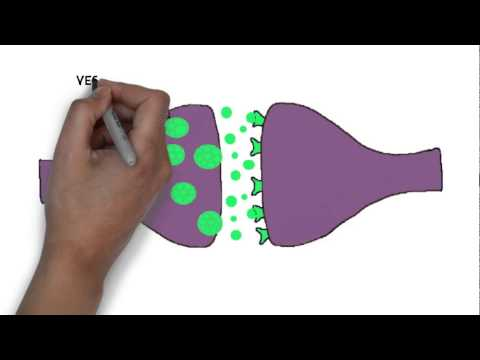

In [3]:
from IPython.display import YouTubeVideo
YouTubeVideo("WhowH0kb7n0")

## "Presynaptic" and "Postsynaptic"
<img src="http://openneuronproject.org/wp-content/uploads/2016/08/synapse.png" width="400px">

### The "strength" of a synapse is how effectively the presynaptic neuron can excite the postsynaptic neuron via synaptic transmission.  

### Let's see what happens to the activity of neurons as we increase or decrease the strength of synapses

unable to execute 'gcc': No such file or directory
WARNING    Cannot use Cython, a test compilation failed: command 'gcc' failed with exit status 1 (CompileError) [brian2.codegen.runtime.cython_rt.cython_rt.failed_compile_test]
INFO       Cannot use compiled code, falling back to the numpy code generation target. Note that this will likely be slower than using compiled code. Set the code generation to numpy manually to avoid this message:
prefs.codegen.target = "numpy" [brian2.devices.device.codegen_fallback]


Starting simulation at t=0. s for a duration of 1. s
0.99994 (99%) simulated in 10s, estimated < 1s remaining.
1.0 (100%) simulated in 10s


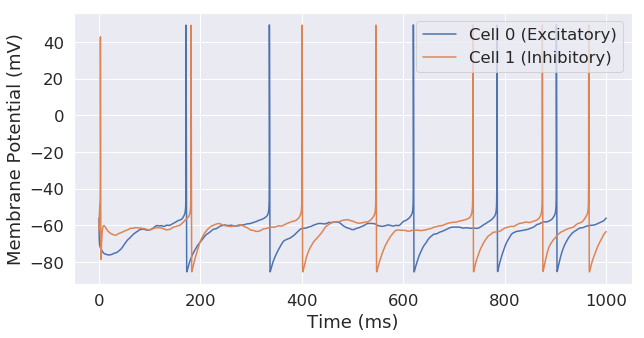

In [4]:
# Import a Python module I wrote for simple neuronal network simulation using the Brian2 package
import hh
from hh import nS # Nanosiemens, a unit of conductance

# Run a simulation with 2 synaptically connected neurons, one excitatory and one inhibitory, but with no synaptic strength!
traces, spikes, phenotypes = hh.go(n_neurons=2, w_e=0*nS, w_i=0*nS)
hh.plot_traces(traces, phenotypes)

### Let's turn on the excitatory synapse

Starting simulation at t=0. s for a duration of 1. s
1.0 (100%) simulated in 9s


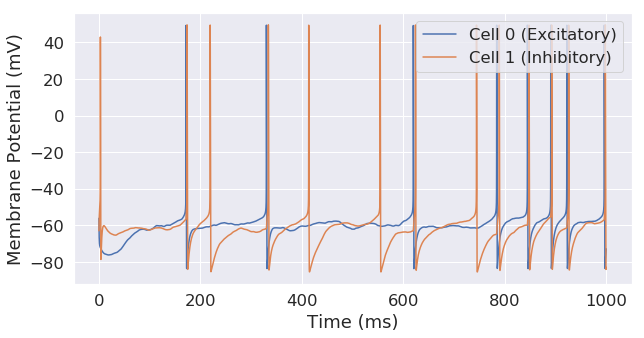

In [5]:
traces, spikes, phenotypes = hh.go(n_neurons=2, w_e=15*hh.nS, w_i=0*hh.nS)
hh.plot_traces(traces, phenotypes)

### Let's turn up the strength of the excitatory synapse

Starting simulation at t=0. s for a duration of 1. s
1.0 (100%) simulated in 9s


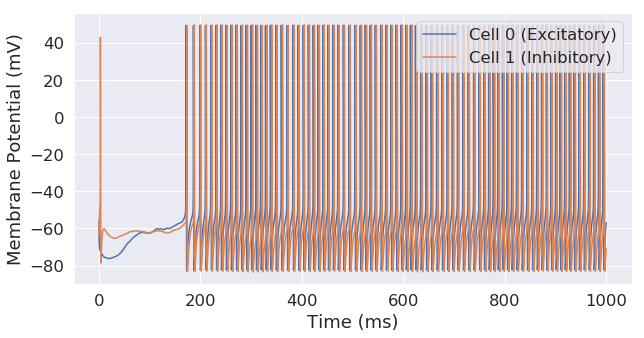

In [6]:
traces, spikes, phenotypes = hh.go(n_neurons=2, w_e=25*nS, w_i=0*nS)
hh.plot_traces(traces, phenotypes)

### Now let's turn up the strength of the inhibitory synapse

Starting simulation at t=0. s for a duration of 1. s
1.0 (100%) simulated in 9s


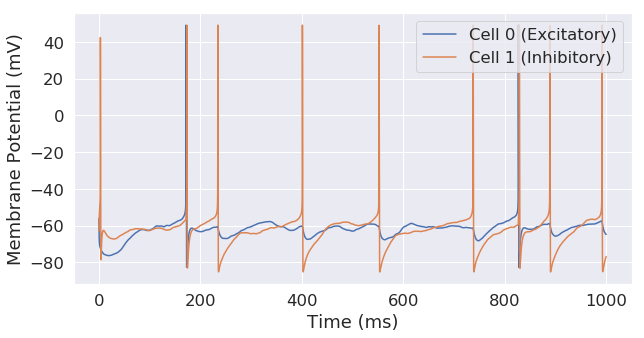

In [7]:
traces, spikes, phenotypes = hh.go(n_neurons=2, w_e=25*hh.nS, w_i=20*hh.nS)
hh.plot_traces(traces, phenotypes)

## How does this produce learning and memory?

#### Hebb, 1949

![hebb](http://www.scholarpedia.org/w/images/f/f0/Cell_Asseblies_Hebb_original_figure.gif)

![assemblies](https://www.researchgate.net/profile/Alexandre_Linhares/publication/262150025/figure/fig1/AS:214037309726732@1428041879350/Cell-assemblies-the-information-encoded-in-a-single-neuron-is-negligible-and-fragile.png)

<img src="https://neuronaldynamics.epfl.ch/online/x589.png" width="600px">

## Where is the math (and data analysis) in these processes?

#### - Signalling pathways (many differential equations!)

<img src="http://science.sciencemag.org/content/sci/298/5594/776/F2.large.jpg" width="600px">

#### - Determining what changed to make the synapse stronger or weaker

<img src="http://openneuronproject.org/wp-content/uploads/2016/08/synapse.png" width="400px">

#### P = Probability of releasing a vesicle (mediated by presynaptic machinery)
#### Q = Impact of one vesicle (amount of neurotransmitter or number of receptors)
#### N = Number of sites where a vesicle might be released (at one or more synapses)

![coins](https://previews.123rf.com/images/wrangel/wrangel1209/wrangel120900447/15451796-us-coins-collection-isolated-on-white-obverse-and-reverse.jpg)

### Mean strength across events: $\mu = P*Q*N$
### Variance in strength across events: $\sigma^2 = N*Q^2*P*(1-P)$
### Coefficient of variation = $\frac{\sigma}{\mu} = \sqrt{\frac{1-P}{P*N}}$

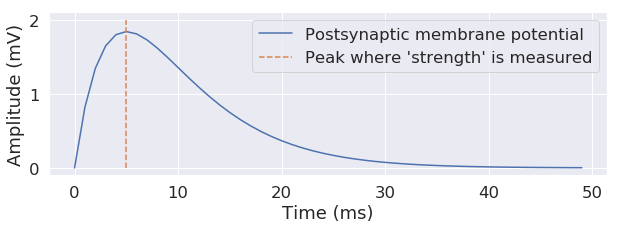

In [87]:
def plot_psp(n=10, q=0.1, p=1, count=1):
    plt.figure(figsize=(10,3))
    t = np.arange(50)
    strengths = q*np.random.binomial(n, p, size=count)
    for i,strength in enumerate(strengths):
        y = strength*t*np.exp(-t/5)
        plt.plot(t,y,label="Postsynaptic membrane potential" if i==0 else None)
    plt.plot([5,5],[0,strengths.max()*2],'--',label="Peak where 'strength' is measured")
    plt.xlabel("Time (ms)")
    plt.ylabel("Amplitude (mV)")
    plt.legend()
plot_psp()

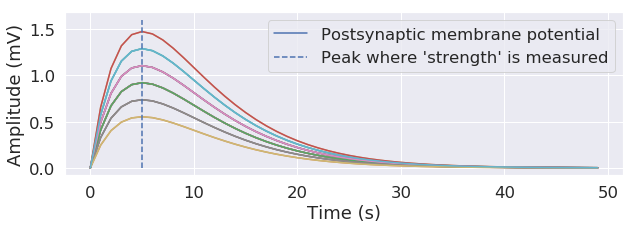

In [47]:
plot_psp(p=0.5, count=20)

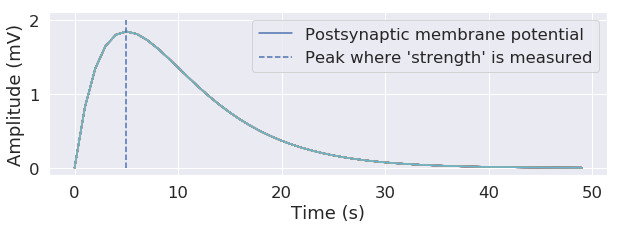

In [48]:
plot_psp(p=1, count=20)

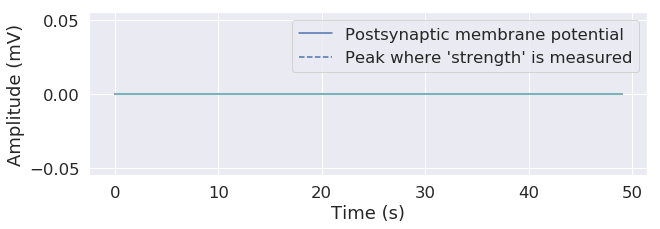

In [49]:
plot_psp(p=0, count=20)

### Mean strength across events: $\mu = P*Q*N$
### Variance in strength across events: 
#### $\sigma^2 = N*Q^2*P*(1-P)$
#### $= N*Q^2*P - N*Q^2*P^2$ 
#### $= \mu*Q - \mu^2/N$


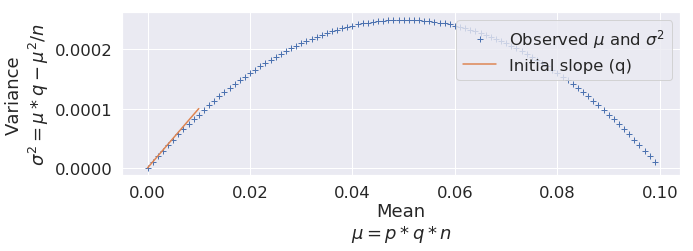

In [86]:
p = np.arange(0,1,0.01)
n = 10
q = 0.01
mu = p*q*n
sigma2 = mu*q - mu*mu/n
plt.figure(figsize=(10,3))
plt.plot(mu, sigma2, '+',label="Observed $\mu$ and $\sigma^2$")
plt.plot([0,0.01],[0,0.01*q],label="Initial slope (q)")
plt.xlabel('Mean\n$\mu = p*q*n$')
plt.ylabel('Variance\n$\sigma^2 = \mu*q - \mu^2/n$')
plt.legend(loc=1);